In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [40]:
from scipy.stats import binom

In [2]:
%matplotlib inline

In [3]:
def odds(p):
    return p / (1-p)

In [4]:
odds(0.75)

3.0

In [5]:
odds(0.1)

0.11111111111111112

In [6]:
odds(0.9)

9.000000000000002

In [7]:
def prob(o):
    return o / (o+1)

In [8]:
prob(3/2)

0.6

In [9]:
# Bayes' Rule - odds(A|D) = odds(A) * (P(D|A)/P(D|B)) - posterior odds are prior odds times likelihood ratio

In [10]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds

1.5

In [11]:
post_prob = prob(post_odds)

In [12]:
post_prob

0.6

In [13]:
likelihood_ratio = (1/4) / (1/2)

post_odds *= likelihood_ratio

In [14]:
post_odds

0.75

In [15]:
post_prob = prob(post_odds)
post_prob

0.42857142857142855

In [16]:
like1 = 0.01
like2 = 2 * 0.6 * 0.01

likelihood_ratio = like1 / like2
likelihood_ratio

0.8333333333333334

In [17]:
post_odds = 1 * like1 / like2
prob(post_odds)

0.45454545454545453

In [18]:
odds(0.9)

9.000000000000002

In [19]:
# Exercise 6-1 - YES!!

# if Pr(A) = 0.9, Odds(A) = 9.0

posterior = odds(0.9) * likelihood_ratio

In [20]:
posterior

7.500000000000002

In [21]:
prob(posterior)

0.8823529411764706

In [22]:
# if Pr(A) = 0.1, Odds(A) = 0.111
posterior2 = odds(0.1) * likelihood_ratio
prob(posterior2)

0.08474576271186442

In [23]:
from empiricaldist import Pmf

In [24]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

In [25]:
die = make_die(6)

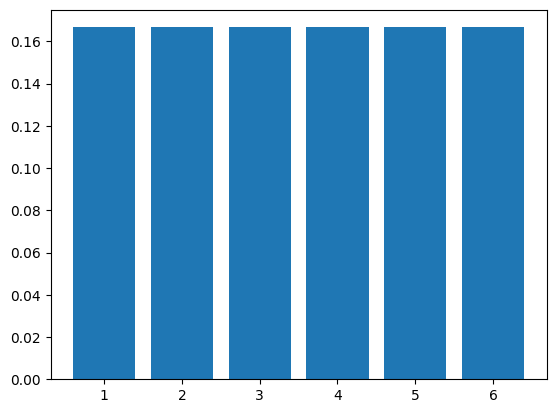

In [26]:
die.bar()

In [27]:
def add_dist(pmf1, pmf2):
    """Distribution of a sum"""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 + p2
            res[q] = res(q) + p
    return res
    

In [28]:
twice = die.add_dist(die)

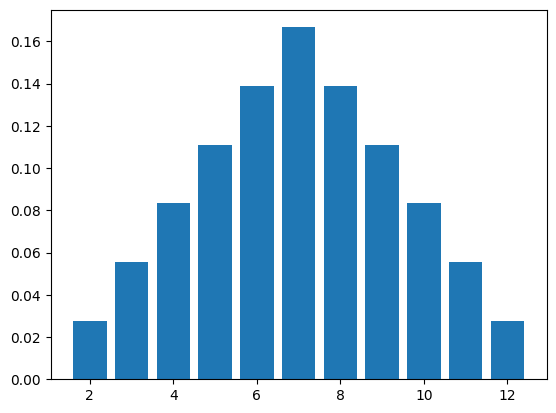

In [29]:
twice.bar()

In [30]:
def add_dist_seq(seq):
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

In [31]:
dice = [die] * 3
thrice = add_dist_seq(dice)

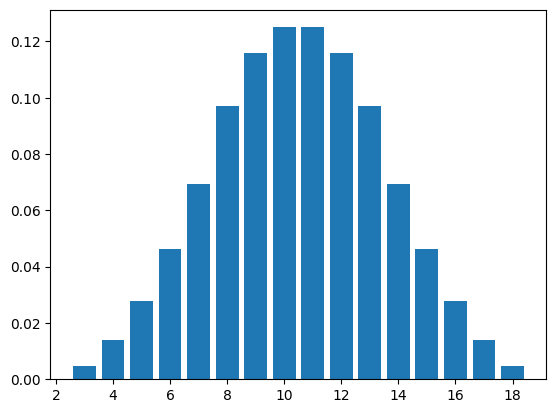

In [32]:
thrice.bar()

([<matplotlib.axis.XTick at 0x7fafd37c8510>,
 [Text(0, 0, '0'),
  Text(3, 0, '3'),
  Text(6, 0, '6'),
  Text(9, 0, '9'),
  Text(12, 0, '12'),
  Text(15, 0, '15'),
  Text(18, 0, '18')])

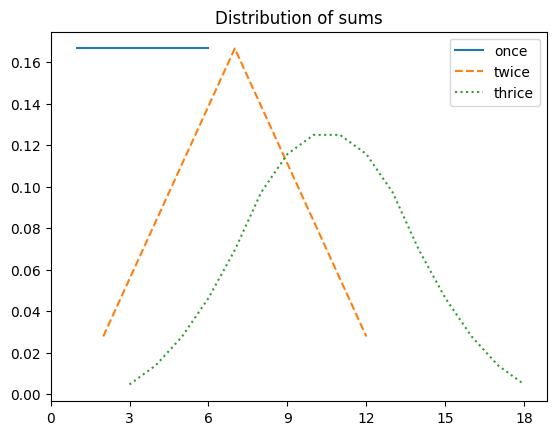

In [35]:
die.plot(label="once", title="Distribution of sums")
twice.plot(label="twice", ls="--")
thrice.plot(label="thrice", ls=":")
plt.legend()
plt.xticks([0,3,6,9,12,15,18])

In [36]:
# Forward Problem

# If we know that 10 of 35 subjects are sensitive to gluten, 25 are not

n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

In [38]:
def make_binomial(n, p):
    """Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

In [41]:
dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.40)

dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

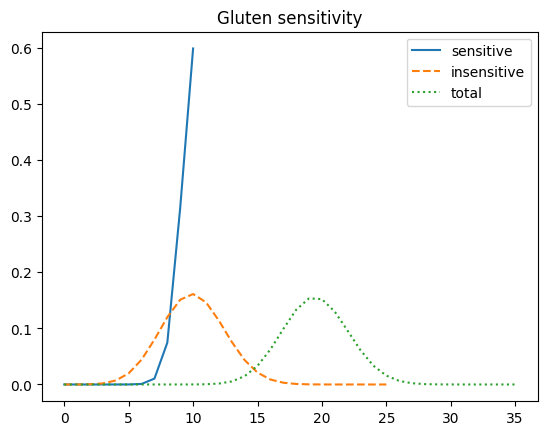

In [42]:
dist_sensitive.plot(label="sensitive", title="Gluten sensitivity")
dist_insensitive.plot(label="insensitive", ls="--")
dist_total.plot(label="total", ls=":")
plt.legend()

In [43]:
# The Inverse Problem, computing the posterior of the number of sensitive subjects
# Looping through the possible values of num_sensitive and computing the distribution of the data for each

table = pd.DataFrame()

for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)
    table[num_sensitive] = dist_total

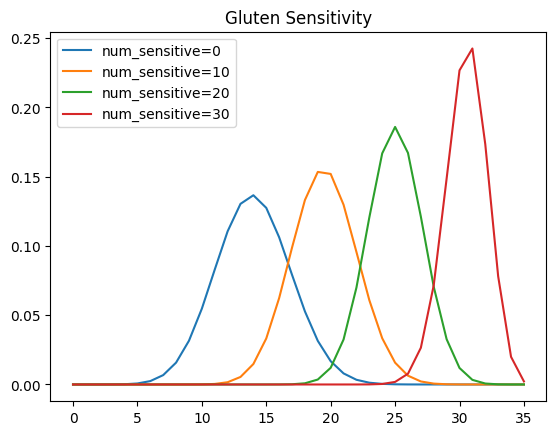

In [44]:
table[0].plot(label="num_sensitive=0", title="Gluten Sensitivity")
table[10].plot(label="num_sensitive=10")
table[20].plot(label="num_sensitive=20")
table[30].plot(label="num_sensitive=30")
plt.legend()

In [45]:
likelihood1 = table.loc[12] # probability of 12 correct identifications for each hypothetical value of num_sensitive

In [46]:
# Now the Bayesian update

hypos = np.arange(n+1)
prior = Pmf(1, hypos)

posterior1 = prior * likelihood1
posterior1.normalize()

likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

np.float64(1.7818649765887378)

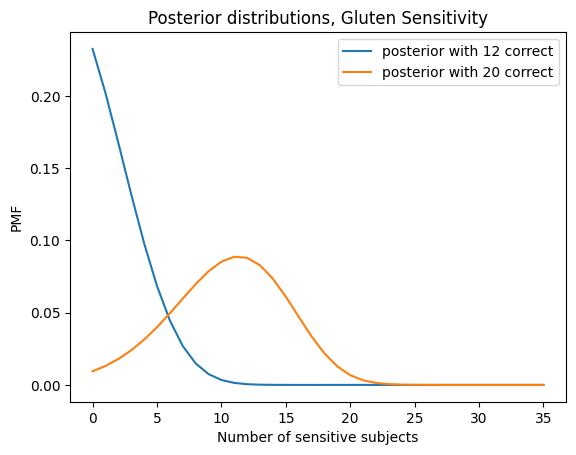

In [47]:
posterior1.plot(label="posterior with 12 correct", title="Posterior distributions, Gluten Sensitivity")
posterior2.plot(label="posterior with 20 correct", xlabel="Number of sensitive subjects", ylabel="PMF")
plt.legend()

In [48]:
posterior1.max_prob()

np.int64(0)

In [49]:
posterior2.max_prob()

np.int64(11)

In [51]:
# Exercise 6-2, the Elvis Problem - what is the probability that Elvis's dead twin brother was an identical twin

# Pr(I) = 1/3

odds(1/3)

0.49999999999999994

In [52]:
# So Odds(I) = 0.5

# LR 1, PR(D|I) / PR[D|F] = 2, based on the fact that Elvis's twin was male
likelihood_ratio_1 = 2

# LR 2, PR(D|I) / PR(D|F) = 1.25, based on the fact that Elvis's twin died at birth
likelihood_ratio_2 = 1.25

post_odds = odds(1/3) * likelihood_ratio_1 

In [53]:
post_odds *= likelihood_ratio_2

In [54]:
prob(post_odds) # YES!!!

0.5555555555555555

In [55]:
# Exercise 6-3 - YES!!!!!

prior = 0.1

# Probability that each friend says YES if it's raining or NO if it isn't = 2/3
# Probability that each friend lies to you = 1/3

likelihood = (2/3) / (1/3)

post_odds = odds(prior) * likelihood * likelihood * likelihood
prob(post_odds)

0.4705882352941177

In [56]:
# Exercise 6-4  - YES!!!!!!

# Pr(S|LC) = Pr(LC) * (Pr(LC|S) / P(S))
# Odds(S|D) = Odds(S) * (Pr(D|S)/Pr(D|NS))

prior = 0.14
likelihood = 25

posterior = odds(0.14) * likelihood
prob(posterior)

0.8027522935779816

In [59]:
# Exercise 6-5

die_plus = die.add_dist(3)

In [60]:
die_plus

,probs
4,0.166667
5,0.166667
6,0.166667
7,0.166667
8,0.166667
9,0.166667


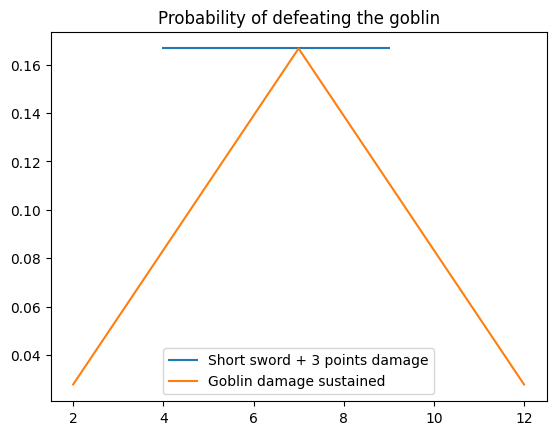

In [61]:
die_plus.plot(label="Short sword + 3 points damage", title="Probability of defeating the goblin")
twice.plot(label="Goblin damage sustained")
plt.legend()

In [62]:
twice_minus = twice.sub_dist(3)

In [63]:
twice_minus

,probs
-1,0.027778
0,0.055556
1,0.083333
2,0.111111
3,0.138889
4,0.166667
5,0.138889
6,0.111111
7,0.083333
8,0.055556


In [64]:
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [65]:
twice_minus[[-1, 0]] = 0
twice_minus.normalize()
twice_minus

,probs
-1,0.000000
0,0.000000
1,0.090909
2,0.121212
3,0.151515
4,0.181818
5,0.151515
6,0.121212
7,0.090909
8,0.060606


In [66]:
twice_after = Pmf.sub_dist(twice_minus, die)

In [67]:
twice_after.prob_le(0)

np.float64(0.4545454545454545)

In [72]:
# Exercise 6-6

die6 = make_die(6)
die8 = make_die(8)
die12 = make_die(12)

hypos = [6, 8, 12]
prior = Pmf(1/3, hypos)

die6_prod = Pmf.mul_dist(die6, die6)
die8_prod = Pmf.mul_dist(die8, die8)
die12_prod = Pmf.mul_dist(die12, die12)



In [73]:
die6_prod

,probs
1,0.027778
2,0.055556
3,0.055556
4,0.083333
5,0.055556
6,0.111111
8,0.055556
9,0.027778
10,0.055556
12,0.111111


In [74]:
die8_prod

,probs
1,0.015625
2,0.031250
3,0.031250
4,0.046875
5,0.031250
6,0.062500
7,0.031250
8,0.062500
9,0.015625
10,0.031250


In [75]:
die12_prod

,probs
1,0.006944
2,0.013889
3,0.013889
4,0.020833
5,0.013889
6,0.027778
7,0.013889
8,0.027778
9,0.020833
10,0.027778


In [76]:
likelihood = [die6_prod(12), die8_prod(12), die12_prod(12)]

In [77]:
posterior = prior * likelihood
posterior.normalize()
posterior # YES!!!!!

,probs
6,0.516129
8,0.290323
12,0.193548


In [78]:
# Exercise 6-7

# We want to know whether the dice thrower is Longfellow, Zostra, or Bellows

hypos = ["Longfellow", "Zostra", "Bellows"]
prior = Pmf(1/3, hypos)

die = make_die(3)
die

,probs
1,0.333333
2,0.333333
3,0.333333


In [79]:
die_c = die.sub_dist(1)
die_c

,probs
0,0.333333
1,0.333333
2,0.333333


In [82]:
longf_dice = add_dist_seq([die_c] * 5)
zostr_dice = add_dist_seq([die_c] * 4)
bells_dice = add_dist_seq([die_c] * 3)

In [83]:
longf_dice

,probs
0,0.004115
1,0.020576
2,0.061728
3,0.123457
4,0.185185
5,0.209877
6,0.185185
7,0.123457
8,0.061728
9,0.020576


In [84]:
like1 = [longf_dice(3), zostr_dice(3), bells_dice(3)]
like2 = [longf_dice(4), zostr_dice(4), bells_dice(4)]
like3 = [longf_dice(5), zostr_dice(5), bells_dice(5)]

In [85]:
posterior = prior * like1 * like2 * like3
posterior.normalize()
posterior # YES!!!!!!

,probs
Longfellow,0.235762
Zostra,0.449704
Bellows,0.314534


In [88]:
# Exercise 6-8

# We care about probability of honest vs dishonest
# Pr(Outperform|Honest) = 0.5
# Pr(Outperform|Dishonest) = 0.9

# Data: 312/538 (0.5799) outperform

#hypos = ["Honest", "Dishonest"]
#prior = Pmf(1/2, hypos)

#likelihood = [0.5, 0.9]

#posterior = prior * likelihood
#posterior.normalize()
#posterior
# No - done like Inverse problem in the solution

In [89]:
n = 538
ns = range(0, n+1)
table = pd.DataFrame(index=ns, columns=ns, dtype=float)

for n_honest in ns:
    n_dishonest = n - n_honest
    
    dist_honest = make_binomial(n_honest, 0.5)
    dist_dishonest = make_binomial(n_dishonest, 0.9)
    dist_total = Pmf.add_dist(dist_honest, dist_dishonest)
    table[n_honest] = dist_total
    
table.shape

(539, 539)

In [90]:
data = 312
likelihood = table.loc[312]
len(likelihood)

539

In [91]:
# Now the Bayes analysis

hypos = np.arange(n+1)
prior = Pmf(1, hypos)
prior.normalize()

posterior = prior * likelihood
posterior.normalize()
posterior.mean()

np.float64(431.48821145019934)

In [92]:
posterior.max_prob()

np.int64(430)

<Axes: title={'center': 'Posterior distribution'}, xlabel='Number of honest members in Congress', ylabel='PMF'>

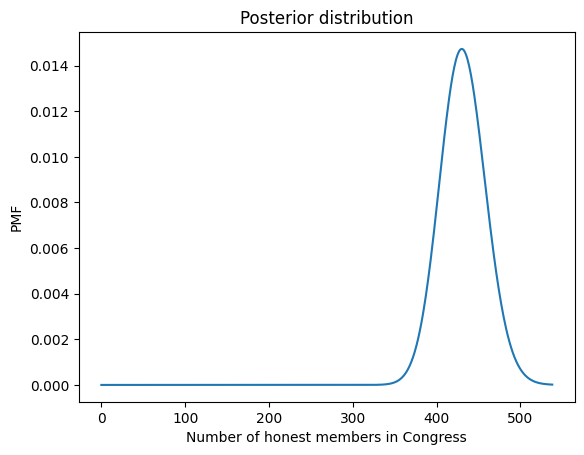

In [93]:
posterior.plot(xlabel="Number of honest members in Congress", ylabel="PMF", title="Posterior distribution")